In [14]:
# setup disply parameters
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from matplotlib.ticker import StrMethodFormatter
float_formatter = StrMethodFormatter('{x:0.03f}')
%pylab inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%config InlineBackend.figure_formats = ['retina', 'pdf', 'png']

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
pylab.rcParams['figure.figsize'] = (18, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/yasser/code/projects/negmas/venv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Run a session of the SCML world

The SCML world (Supply Chain Management League) ships as an example world with `NegMAS`. It is used as one of the leagues of ANAC 2019.

In this tutorial, you will test a run of this world.

Firstly, let's import everything from the SCML app

In [2]:
from negmas.apps.scml import *

There are several ways to create an SCML world. One of the simplest is to use one of the class methods of the `SCMLWorld` class. The resulting world will have > 100 production steps so simulating it will take a while. If you want to just test your installation (and do not care whether you get an accurate indicator of agent performance), you can set the number of steps to a small value (e.g. n_steps=10).

In [3]:
world = SCMLWorld.single_path_world(agent_names_reveal_type=True
                                    # , n_steps=10                        # remove this comment for a fast test but do not expect factories to gain anything
                                   )

For debugging purposes, we set ```agent_names_reveal_type``` to true to be able to know the type of an agent from its name. During the actual ANAC 2019 competition this is passed as ```False``` preventing agents from knowing the type of other agents by just inspecting their name.
Now you can run this world simulation by just calling `run`.

In [4]:
world.run()

Let's see what happened in this run. Firstly, how many negotiations were conducted over time

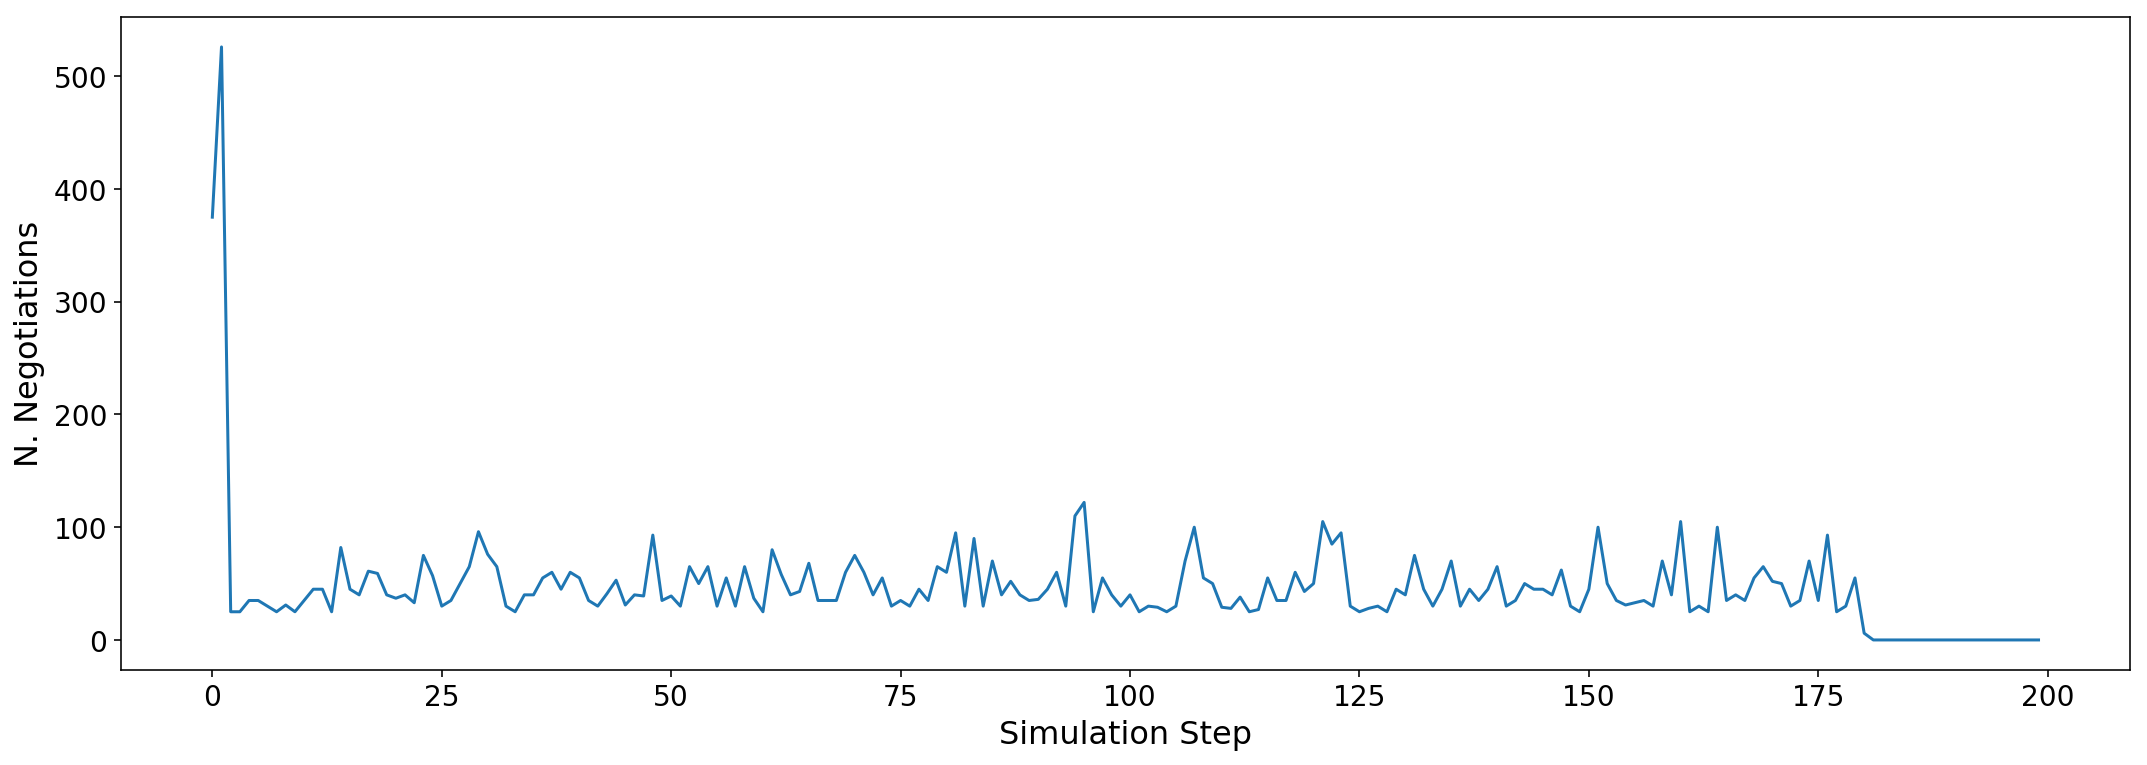

In [15]:
plt.plot(world.stats['n_negotiations'])
plt.xlabel('Simulation Step')
plt.ylabel('N. Negotiations')
plt.show()

It is clear that many negotiations happened at the beginning of the simulation with smaller number later. That is expected as the consumers publish their calls for proposals early on.

Several other statistics are available:

In [16]:
print(list(world.stats.keys()))

['n_cfps_on_board_before', 'n_registered_negotiations_before', 'n_contracts_executed', 'n_contracts_cancelled', 'n_breaches', 'breach_level', 'n_contracts_signed', 'n_contracts_concluded', 'n_negotiations', 'n_registered_negotiations_after', 'activity_level', 'n_cfps', 'n_cfps_on_board_after', '_balance_bank', '_balance_society', '_balance_insurance', '_storage_insurance', 'balance_m_0', 'storage_m_0', 'balance_m_1', 'storage_m_1', 'balance_m_2', 'storage_m_2', 'balance_m_3', 'storage_m_3', 'balance_m_4', 'storage_m_4', 'balance_c_0', 'storage_c_0', 'balance_c_1', 'storage_c_1', 'balance_c_2', 'storage_c_2', 'balance_c_3', 'storage_c_3', 'balance_c_4', 'storage_c_4', 'balance_greedy_1_0', 'storage_greedy_1_0', 'balance_greedy_1_1', 'storage_greedy_1_1', 'balance_greedy_1_2', 'storage_greedy_1_2', 'balance_greedy_1_3', 'storage_greedy_1_3', 'balance_greedy_1_4', 'storage_greedy_1_4', 'market_size', 'production_failures', '_market_size_total']


We can for example check the activity level of this world (defined as the total amount of money transferred due to trade)

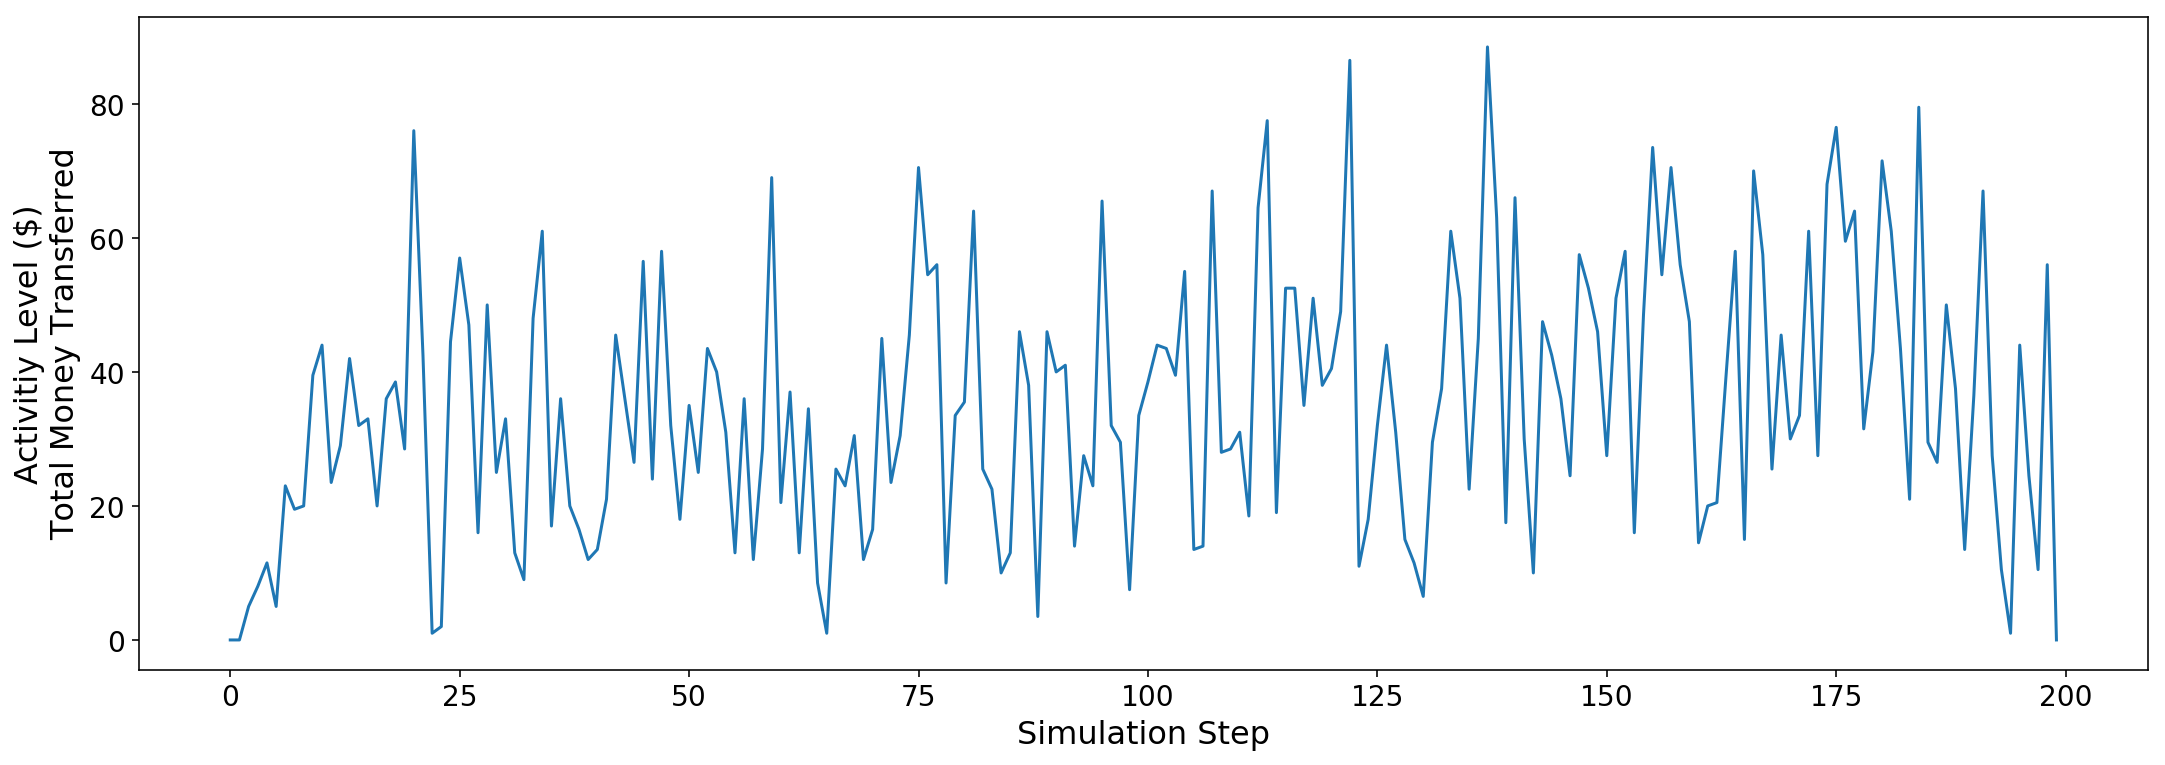

In [17]:
plt.plot(world.stats['activity_level'])
plt.xlabel('Simulation Step')
plt.ylabel('Activitiy Level ($)\nTotal Money Transferred')
plt.show()

We can see a picture of contracting in this world as follows:

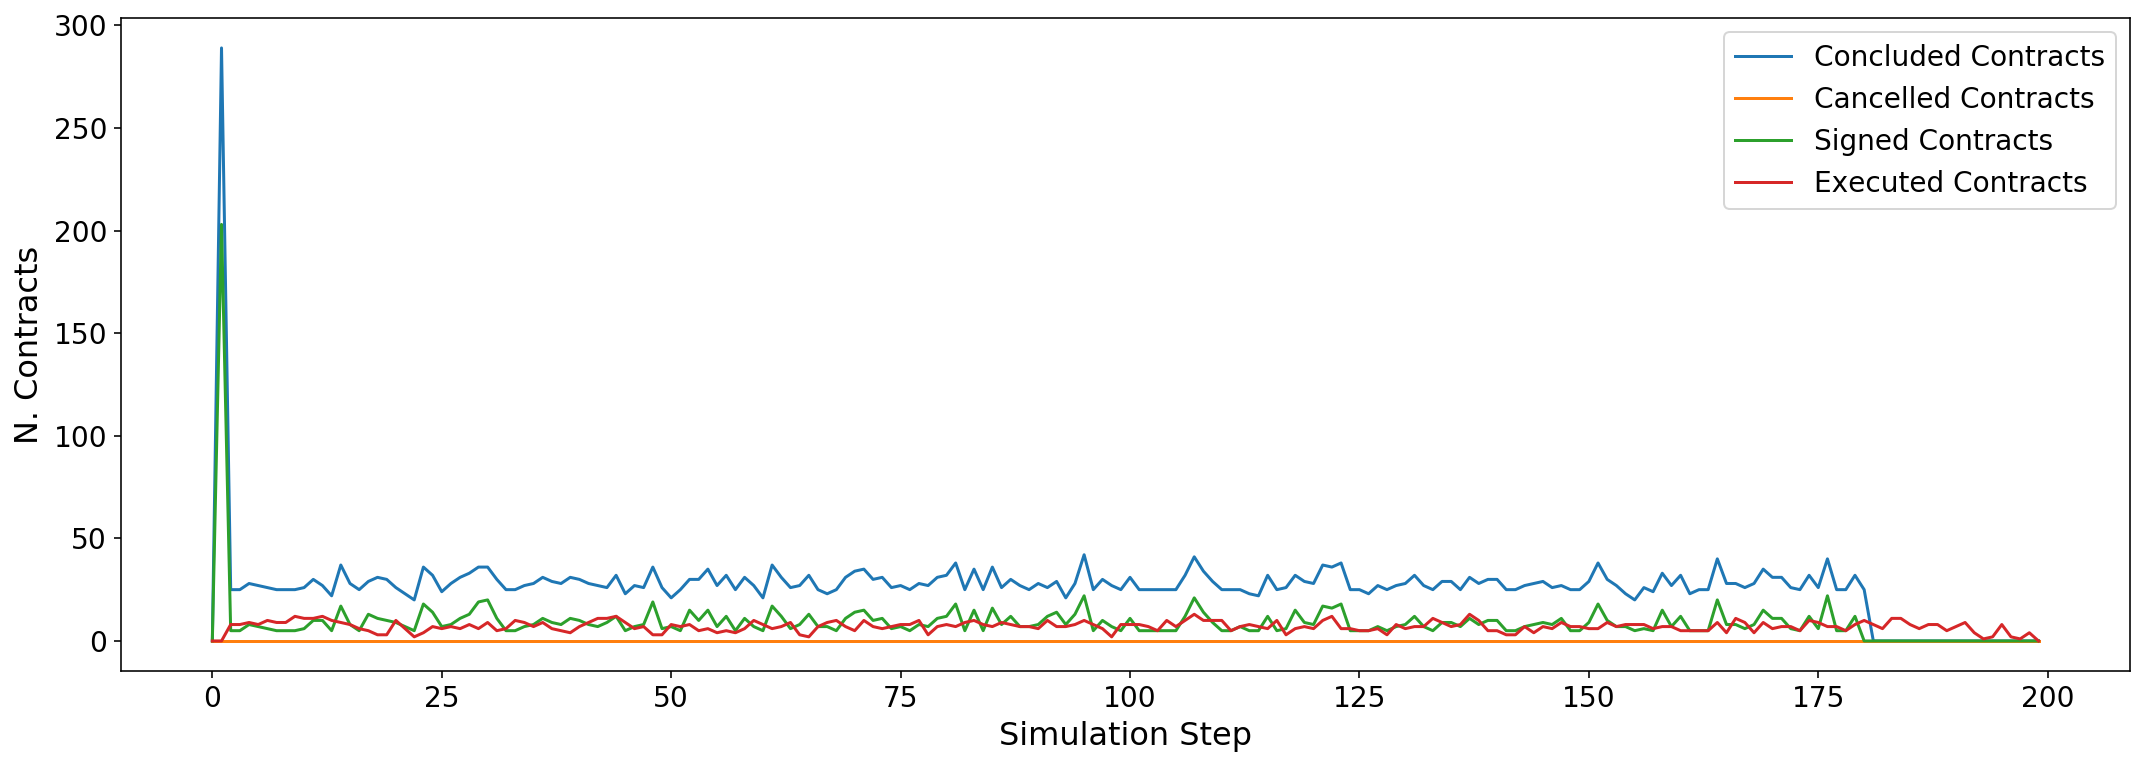

In [18]:
plt.plot(world.stats['n_contracts_concluded'], label='Concluded Contracts')
plt.plot(world.stats['n_contracts_cancelled'], label='Cancelled Contracts') 
plt.plot(world.stats['n_contracts_signed'], label='Signed Contracts') 
plt.plot(world.stats['n_contracts_executed'], label='Executed Contracts')
plt.legend()
plt.xlabel('Simulation Step')
plt.ylabel('N. Contracts')
plt.show()

We can also check the breaches that happened

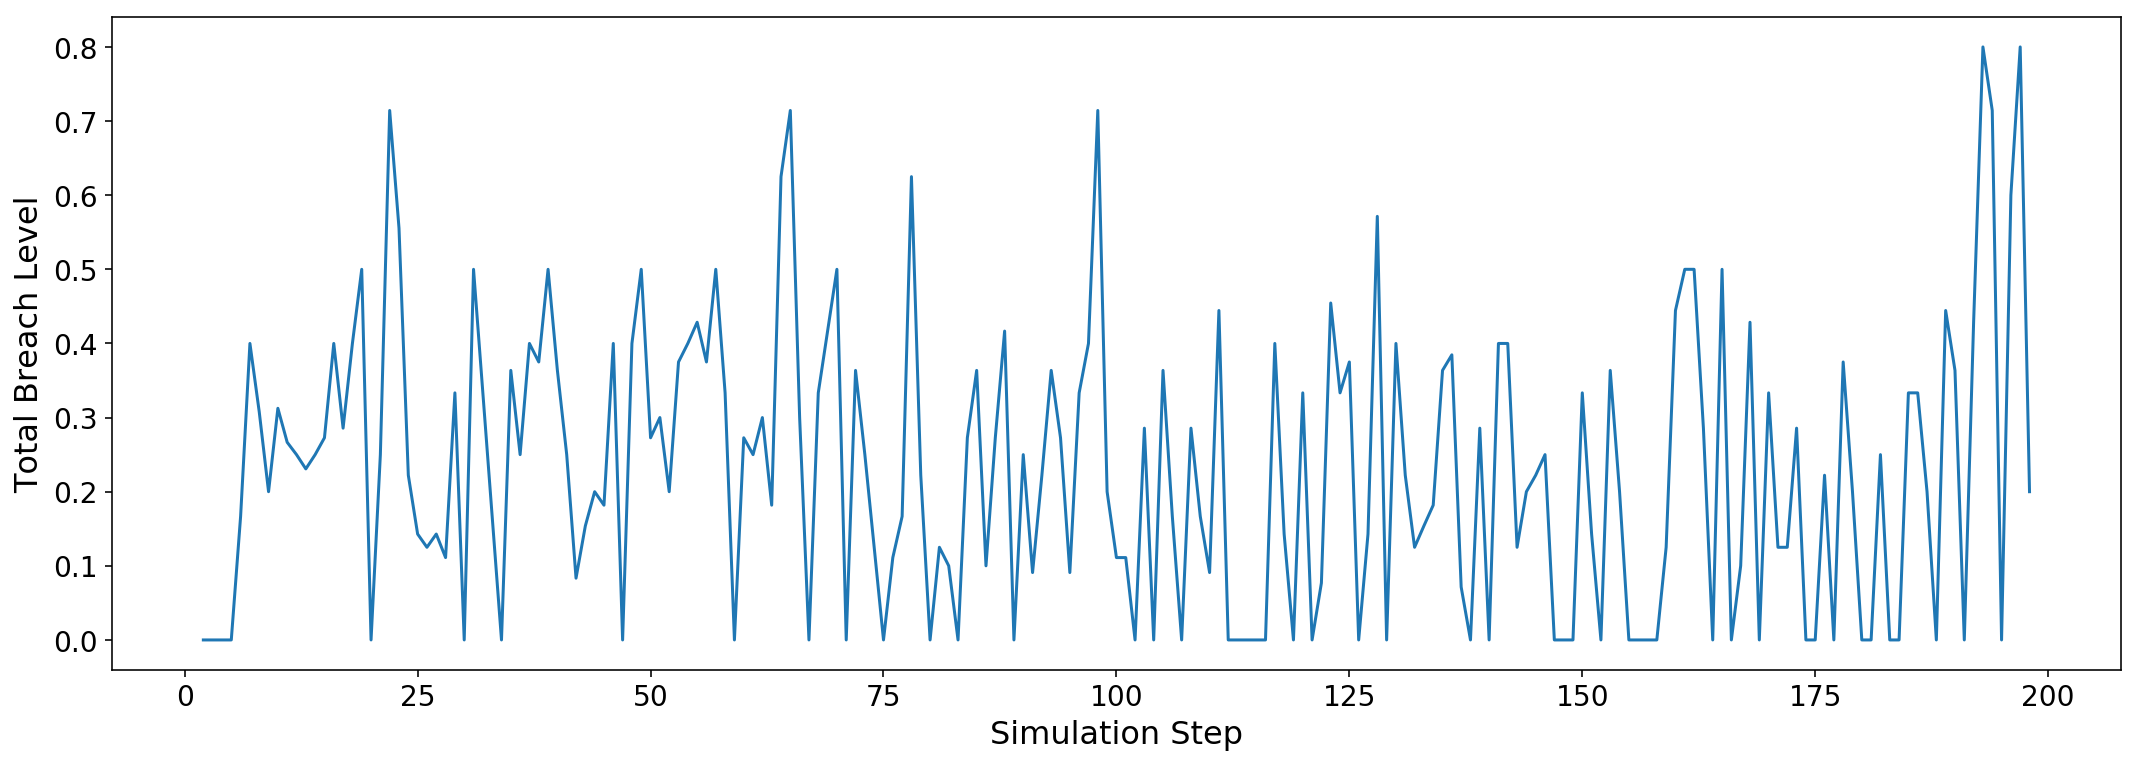

In [19]:
plt.plot(world.stats['breach_level'])
plt.xlabel('Simulation Step')
plt.ylabel('Total Breach Level')
plt.show()

It is also possible to focus on the behavior of some specific agent. Let's first find who was the winner (the factory manager that got maximum wealth). Notice that there can be multiple winners

In [20]:
world.winners

[greedy_1_0]

What was the balance of this winner over time:

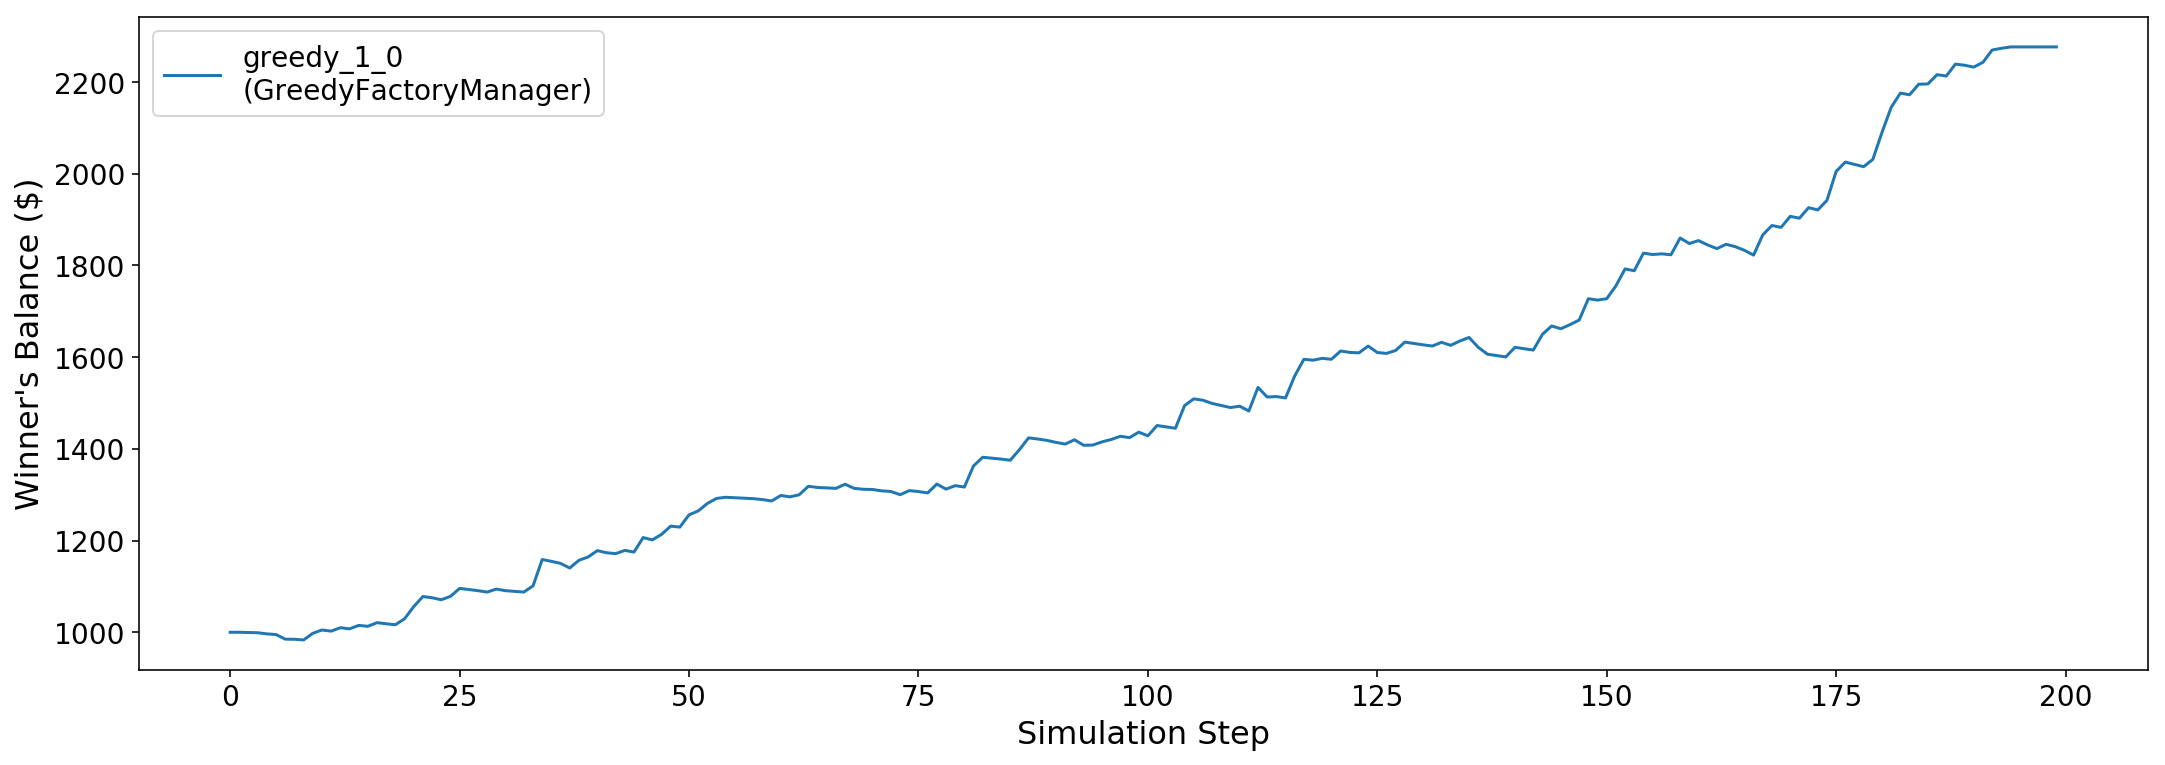

In [21]:
for winner in world.winners:
    plt.plot(world.stats[f'balance_{winner}'], label=f'{winner}\n({winner.__class__.__name__})')
plt.legend()
plt.xlabel('Simulation Step')
plt.ylabel('Winner\'s Balance ($)')
plt.show()

Let's check how did its total storage change over time:

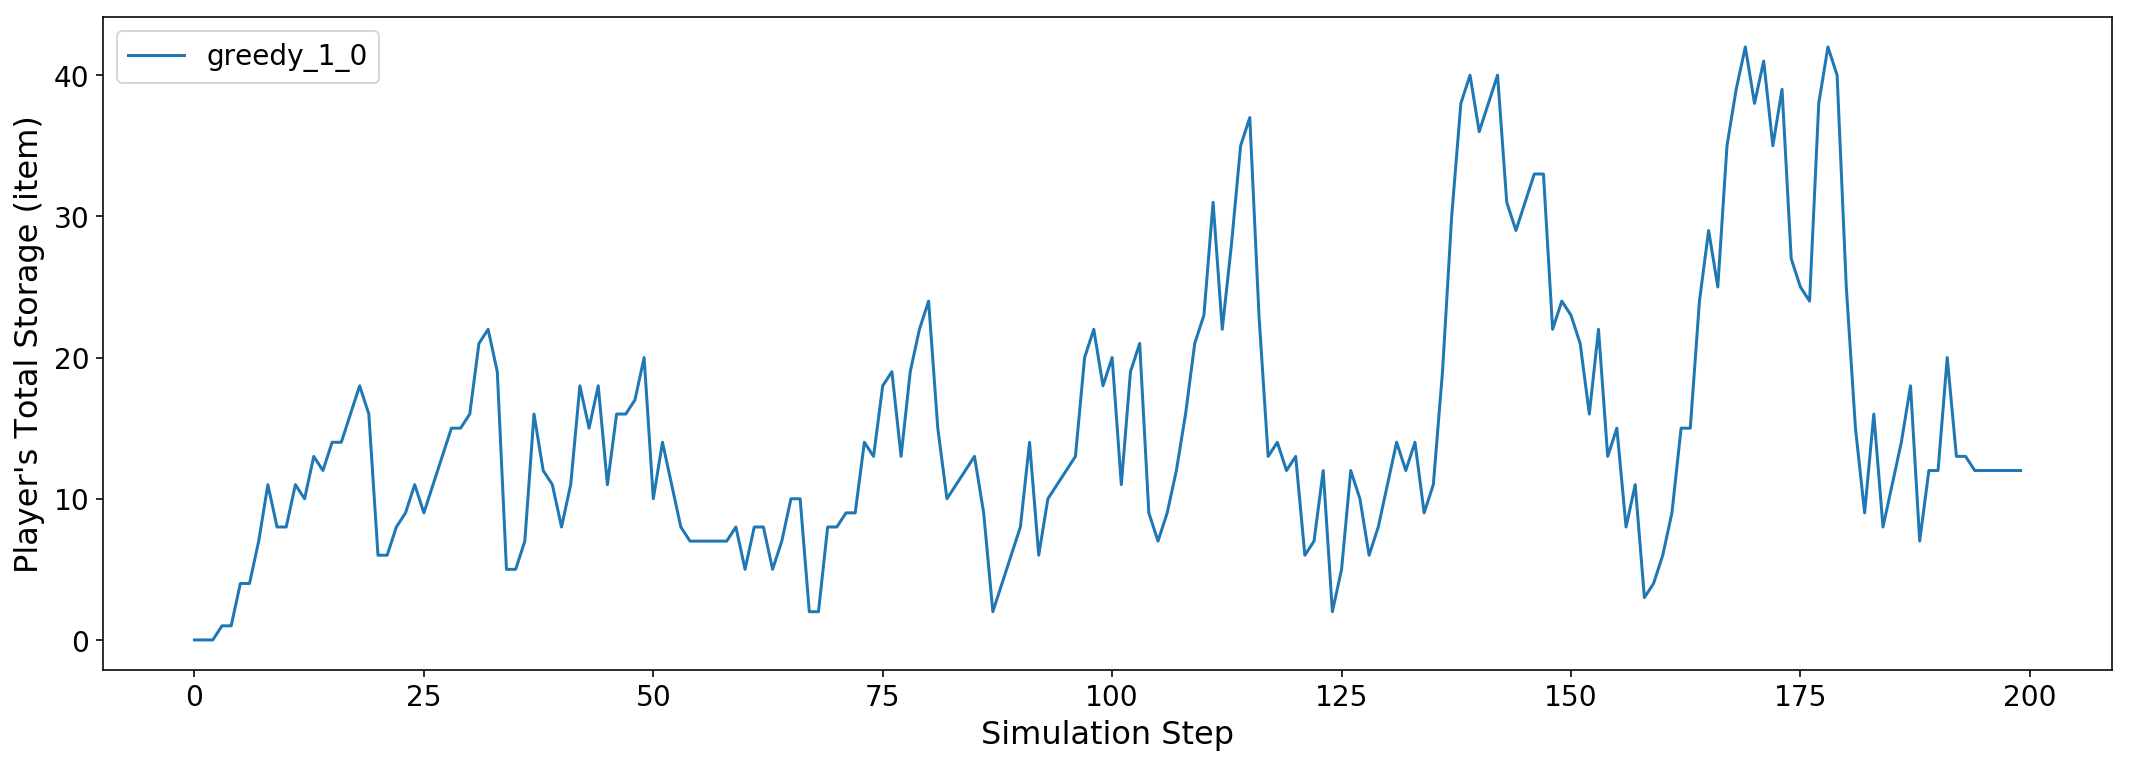

In [22]:
for winner in world.winners:
    plt.plot(world.stats[f'storage_{winner}'], label=winner)
plt.xlabel('Simulation Step')
plt.ylabel('Player\'s Total Storage (item)')
plt.legend()
plt.show()

We can actually check what happens to ALL competitors:

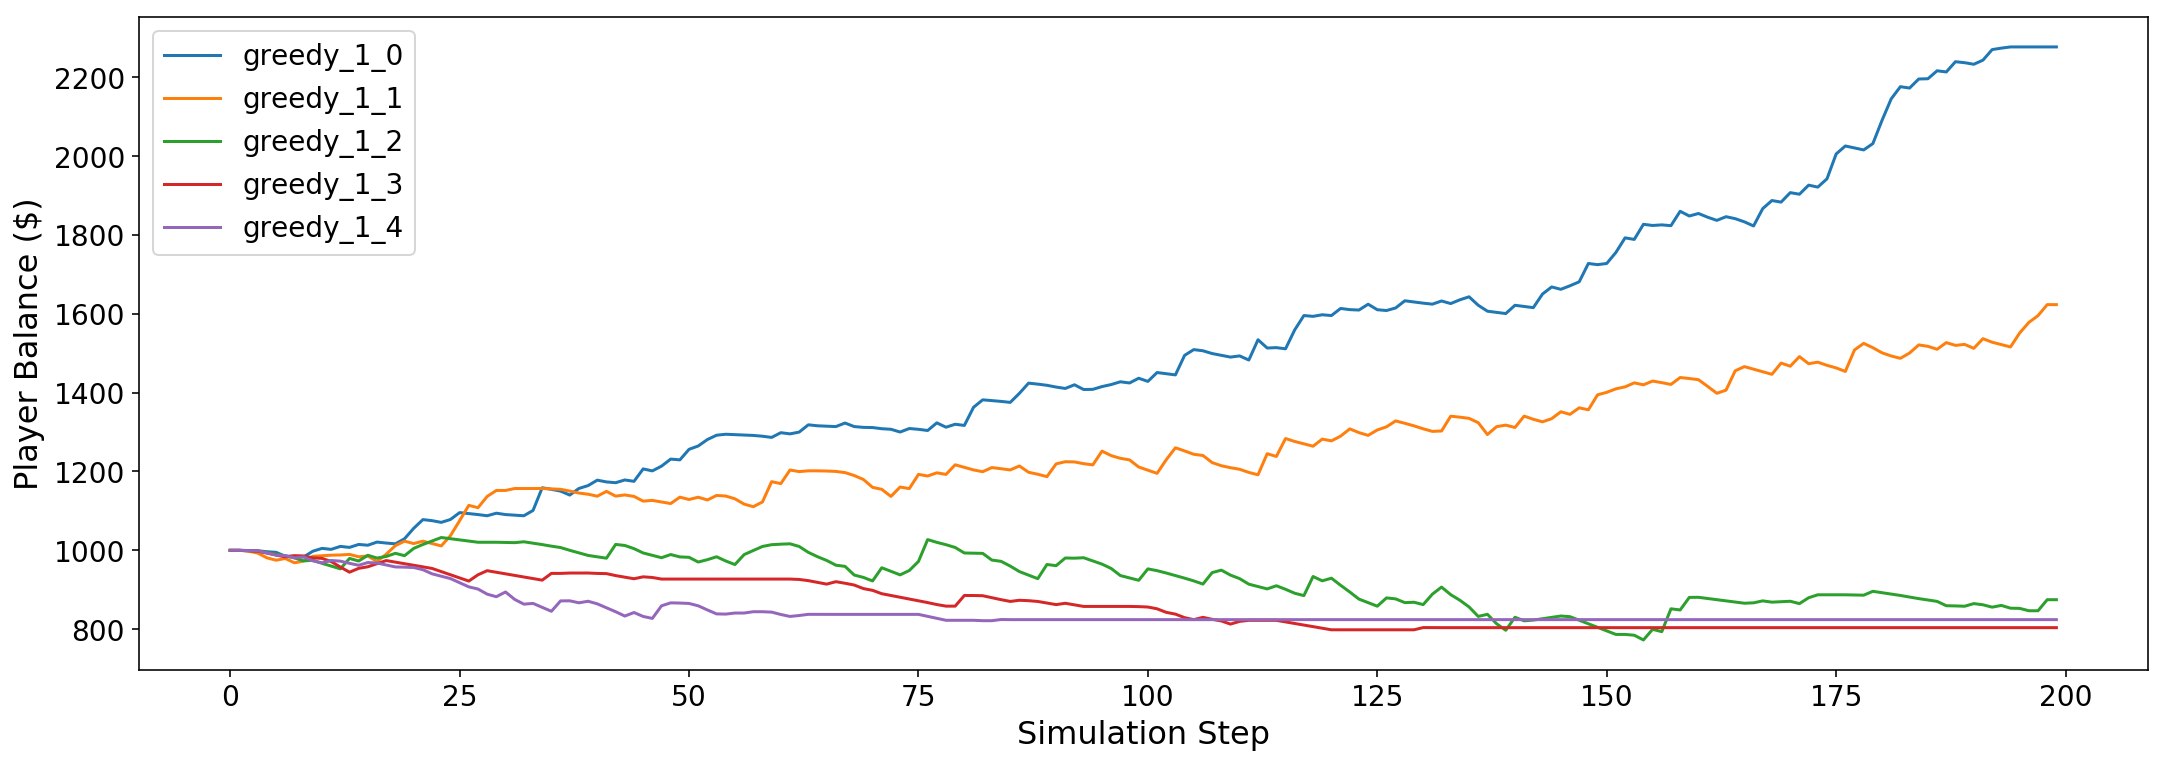

In [23]:
for name, _ in sorted(((_.name, _) for _ in world.factory_managers), key=lambda x: x[0]):    
    plt.plot(world.stats[f'balance_{name}'], label=name)
plt.xlabel('Simulation Step')
plt.ylabel('Player Balance ($)')
plt.legend()
plt.show()

It is clear form the figure that the winner was by far the best player. 